#Hackathon JEYARATNAM Joshua
Dataset 3


##Importing librairies

In [2]:
try :
  # % tensorflow_version only exists in Colab .
  % tensorflow_version 2.x
except Exception :
  pass

In [3]:
from __future__ import absolute_import , division , print_function ,unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Helper libraries 
import numpy as np
import matplotlib . pyplot as plt

Here we import our dataset 

In [4]:
data_train = pd.read_csv("php5s7Ep8_train_3.csv",header=None)
data_test= pd.read_csv("php5s7Ep8_test.csv",header=None)


In [5]:
col_names= ['X Minimum','X Maximum','Y Minimum','Y Maximum','Pixels Areas',
'X Perimeter','Y Perimeter','Sum of Luminosity','Minimum of Luminosity',
'Maximum of Luminosity','Length of Conveyer','TypeOfSteel A300','TypeOfSteel A400',
'Steel Plate Thickness','Edges Index','Empty Index','Square Index','Outside X Index',
'Edges X Index','Edges Y Index','Outside Global Index','LogOfAreas',
'Log X Index','Log Y Index','Orientation Index','Luminosity Index','SigmoidOfAreas','target']

In [6]:
data_train.columns=col_names


We check de types of each input to check what we will have to modify. So in our case we have to encode the last column because it's a type object. We have to encode it because it is also our labels

In [7]:
data_train.dtypes

X Minimum                  int64
X Maximum                  int64
Y Minimum                  int64
Y Maximum                  int64
Pixels Areas               int64
X Perimeter                int64
Y Perimeter                int64
Sum of Luminosity          int64
Minimum of Luminosity      int64
Maximum of Luminosity      int64
Length of Conveyer         int64
TypeOfSteel A300           int64
TypeOfSteel A400           int64
Steel Plate Thickness      int64
Edges Index              float64
Empty Index              float64
Square Index             float64
Outside X Index          float64
Edges X Index            float64
Edges Y Index            float64
Outside Global Index     float64
LogOfAreas               float64
Log X Index              float64
Log Y Index              float64
Orientation Index        float64
Luminosity Index         float64
SigmoidOfAreas           float64
target                    object
dtype: object

Let's check how the dataset looks like

In [8]:
print(data_train)

      X Minimum  X Maximum  Y Minimum  Y Maximum  Pixels Areas  X Perimeter  \
0           188        198    3942253    3942263            74           11   
1          1343       1351      46714      46725            56           11   
2          1508       1550    1791800    1791803            92           42   
3           405        416     634279     634288            71           15   
4           763        780     677184     677200           178           20   
...         ...        ...        ...        ...           ...          ...   
1548         61         78    1036126    1036161           265           47   
1549        244        261     184455     184498           460           49   
1550        325        361      58567      58747          2059          134   
1551         41        190     508837     508896          5702          216   
1552         89        151    2584705    2584775          1909          175   

      Y Perimeter  Sum of Luminosity  Minimum of Lu

Here we plot the correlation matrix. We can see witch features is strongly correlated. We can eventualy drop the features that are not strongly correlated

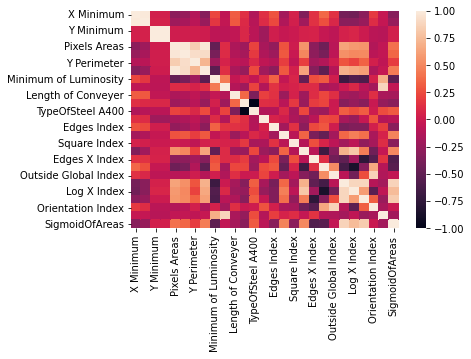

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data_train.corr())
plt.show()

## Preprocessing and normalizing dataset

Here we normalize de train and test set as usual using mean and std

In [10]:
train_normalized = (data_train.iloc[:, :-1]-data_train.iloc[:, :-1].mean())/data_train.iloc[:, :-1].std()
test_normalized = (data_test.iloc[:, :-1]-data_test.iloc[:, :-1].mean())/data_test.iloc[:, :-1].std()

We can see that our data is normalised. Data normalization ensures that your data looks, reads, and can be utilized the same way across all of dataset.

In [11]:
print(train_normalized)

      X Minimum  X Maximum  Y Minimum  Y Maximum  Pixels Areas  X Perimeter  \
0     -0.747612  -0.853918   1.293756   1.293719     -0.331956    -0.313866   
1      1.474968   1.464211  -0.891903  -0.891920     -0.335237    -0.313866   
2      1.792479   1.864304   0.087208   0.087177     -0.328675    -0.218570   
3     -0.330036  -0.415625  -0.562239  -0.562261     -0.332503    -0.301570   
4      0.358867   0.316204  -0.538167  -0.538184     -0.312997    -0.286199   
...         ...        ...        ...        ...           ...          ...   
1548  -0.991999  -1.095180  -0.336776  -0.336785     -0.297137    -0.203199   
1549  -0.639850  -0.727255  -0.814621  -0.814621     -0.261590    -0.197051   
1550  -0.483981  -0.526203  -0.885252  -0.885175      0.029902     0.064245   
1551  -1.030486  -0.870002  -0.632621  -0.632613      0.694009     0.316318   
1552  -0.938119  -0.948412   0.532080   0.532084      0.002558     0.190282   

      Y Perimeter  Sum of Luminosity  Minimum of Lu

Here we separate de dataframe in order to have 26 features and the last column for the label

In [12]:
X_train=train_normalized
X_train=X_train.values

In [13]:
Y_train=data_train.iloc[:,-1:]
Y_train=Y_train.values

In [14]:
Y_train

array([['Bumps'],
       ['Other_Faults'],
       ['Other_Faults'],
       ...,
       ['Other_Faults'],
       ['K_Scratch'],
       ['K_Scratch']], dtype=object)

In [15]:
X_test=test_normalized.values
print(X_test)

[[ 1.01043033  0.98055702  0.24592938 ...  0.08470556  0.21232128
  -1.21057208]
 [ 1.44289882  1.43766493  0.53055912 ...  0.78943668  0.55272591
  -0.93925977]
 [ 0.2350353   0.19264734 -0.46840906 ... -0.31127688 -0.98798101
   0.36397691]
 ...
 [-0.82041642 -0.94611271 -0.30692569 ...  1.28637504  0.81657368
  -0.60202384]
 [-0.88900173 -1.00224877 -0.58353811 ...  0.5726265  -0.02145058
   0.19609142]
 [-0.77278773 -0.89398637 -0.01215003 ...  0.72455045  0.15216945
  -0.97324706]]


In [16]:
Y_test=data_test.iloc[:,-1:]
Y_test=Y_test.values
print(Y_test)

[['Other_Faults']
 ['Bumps']
 ['Bumps']
 ['Dirtiness']
 ['Other_Faults']
 ['Bumps']
 ['K_Scratch']
 ['Pastry']
 ['Pastry']
 ['K_Scratch']
 ['K_Scratch']
 ['Pastry']
 ['Z_Scratch']
 ['K_Scratch']
 ['K_Scratch']
 ['Bumps']
 ['Other_Faults']
 ['Z_Scratch']
 ['Pastry']
 ['Other_Faults']
 ['Other_Faults']
 ['Bumps']
 ['Bumps']
 ['Pastry']
 ['Other_Faults']
 ['K_Scratch']
 ['Bumps']
 ['Other_Faults']
 ['Other_Faults']
 ['Z_Scratch']
 ['K_Scratch']
 ['Other_Faults']
 ['Other_Faults']
 ['Pastry']
 ['Bumps']
 ['Other_Faults']
 ['K_Scratch']
 ['K_Scratch']
 ['Bumps']
 ['Other_Faults']
 ['Bumps']
 ['Other_Faults']
 ['K_Scratch']
 ['Pastry']
 ['Dirtiness']
 ['Other_Faults']
 ['Other_Faults']
 ['Other_Faults']
 ['Pastry']
 ['Z_Scratch']
 ['Other_Faults']
 ['K_Scratch']
 ['Bumps']
 ['Other_Faults']
 ['Bumps']
 ['Bumps']
 ['Other_Faults']
 ['Other_Faults']
 ['Pastry']
 ['Other_Faults']
 ['Z_Scratch']
 ['Other_Faults']
 ['Bumps']
 ['Bumps']
 ['Z_Scratch']
 ['Other_Faults']
 ['Z_Scratch']
 ['Stains']
 

We check if the shapes ar properly well suited

In [17]:
print('X_train.shape = ',X_train.shape)
print('X_test.shape = ',X_test.shape)
print('Y_train.shape = ',Y_train.shape)
print('Y_test.shape = ',Y_test.shape)

X_train.shape =  (1553, 27)
X_test.shape =  (388, 27)
Y_train.shape =  (1553, 1)
Y_test.shape =  (388, 1)


Here we encode Encode Labels 

In [18]:
from sklearn import preprocessing 
LabelEnc = preprocessing.LabelEncoder()
LabelEnc.fit(Y_train)
Y_train=LabelEnc.transform(Y_train)
Y_test =LabelEnc.transform(Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(Y_train)
print(Y_test)


[0 3 3 ... 3 2 2]
[3 0 0 1 3 0 2 4 4 2 2 4 6 2 2 0 3 6 4 3 3 0 0 4 3 2 0 3 3 6 2 3 3 4 0 3 2
 2 0 3 0 3 2 4 1 3 3 3 4 6 3 2 0 3 0 0 3 3 4 3 6 3 0 0 6 3 6 5 0 2 3 2 3 0
 0 3 0 0 0 0 6 2 0 3 0 3 3 2 2 6 2 3 2 0 3 6 5 0 6 5 2 3 0 2 4 3 5 0 6 2 0
 0 3 4 0 6 2 6 1 2 2 3 2 5 4 0 0 1 0 6 5 5 6 4 4 2 3 3 2 2 3 2 3 0 0 4 0 3
 0 2 2 0 6 0 0 1 2 3 0 0 4 2 5 0 0 5 3 3 6 2 6 3 6 2 3 3 4 3 3 3 3 6 0 4 0
 3 3 5 3 3 3 6 0 6 6 3 0 2 5 3 3 3 3 0 4 2 0 3 0 6 0 3 2 2 3 0 4 0 6 2 6 6
 3 2 0 2 0 3 4 2 3 0 3 3 2 4 2 2 3 3 3 2 3 1 2 3 3 3 0 6 4 2 3 3 0 3 3 2 2
 2 3 4 4 5 6 0 2 3 4 3 2 2 3 0 3 4 6 4 0 0 1 2 6 2 2 0 4 3 0 2 2 0 2 3 3 0
 3 3 2 6 2 0 0 6 4 3 3 3 2 4 2 2 2 3 0 4 2 3 3 2 0 2 2 2 2 3 2 0 3 6 6 4 3
 3 1 0 1 0 6 0 3 0 3 4 3 2 2 2 4 4 3 2 0 3 5 2 0 3 0 0 2 5 3 2 3 5 6 3 3 0
 3 6 0 0 1 3 0 1 2 5 2 3 3 5 3 6 0 6]


Here there are all the labels for our dataset

In [20]:
LabelEnc.classes_

array(['Bumps', 'Dirtiness', 'K_Scratch', 'Other_Faults', 'Pastry',
       'Stains', 'Z_Scratch'], dtype=object)

In [21]:
Y_train

array([0, 3, 3, ..., 3, 2, 2])

## Neural Network modeling

First Model

For our first model I choose to use 3 relu activation function for our fully connected layers. I choose relu function because we are looking for output between 1 and 7. And for the last we use softmax. I put 2 dropout and  I choose to use the Adam optimizer. I have tested with adagrad, rmsprop, ada etc... but there are not suit very well in our case.

In [22]:
original_model2= keras.Sequential([
 keras.layers.Dense(128 , activation ='relu',input_dim=27),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(64 , activation ='relu',),
 keras.layers.Dropout(0.25),
 keras.layers.Dense(10 , activation ='relu',),
 keras.layers.Dense(7,activation='softmax')])


original_model2.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])

Here we fit the model with a validation data

In [23]:
original_hist=original_model2.fit(X_train,Y_train,batch_size=512,epochs=75,validation_data=(X_test,Y_test))

Epoch 1/75
4/4 [==============================] - 4s 299ms/step - loss: 1.9157 - accuracy: 0.2312 - val_loss: 1.7947 - val_accuracy: 0.3737
Epoch 2/75
4/4 [==============================] - 0s 32ms/step - loss: 1.8096 - accuracy: 0.3220 - val_loss: 1.7324 - val_accuracy: 0.3814
Epoch 3/75
4/4 [==============================] - 0s 47ms/step - loss: 1.7310 - accuracy: 0.3838 - val_loss: 1.6753 - val_accuracy: 0.4381
Epoch 4/75
4/4 [==============================] - 0s 28ms/step - loss: 1.6626 - accuracy: 0.4301 - val_loss: 1.6134 - val_accuracy: 0.4485
Epoch 5/75
4/4 [==============================] - 0s 41ms/step - loss: 1.6186 - accuracy: 0.4430 - val_loss: 1.5512 - val_accuracy: 0.4485
Epoch 6/75
4/4 [==============================] - 0s 33ms/step - loss: 1.5581 - accuracy: 0.4495 - val_loss: 1.5007 - val_accuracy: 0.4510
Epoch 7/75
4/4 [==============================] - 0s 36ms/step - loss: 1.5275 - accuracy: 0.4668 - val_loss: 1.4592 - val_accuracy: 0.4588
Epoch 8/75
4/4 [==========

Here we plot the training and validation accuracy. Our model doesn't not overfit. So it is a good model. Let's try to have better results. 

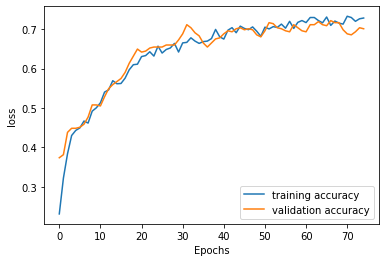

In [24]:
plt.figure()
plt.plot(original_hist.history['accuracy'])
plt.plot(original_hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

Second Model
We add l2 regularizers to our first model. We can add some epochs. 

In [34]:
from keras import regularizers

original_model3= keras.Sequential([
 keras.layers.Dense(128 , activation ='relu',input_dim=27),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(64 , activation ='relu',kernel_regularizer=regularizers.l2(0.001)),
 keras.layers.Dropout(0.25),
 keras.layers.Dense(16 , activation ='relu',kernel_regularizer=regularizers.l2(0.003)),
 keras.layers.Dense(7,activation='softmax')])


original_model3.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])


In [35]:
hist2=original_model3.fit(X_train,Y_train,batch_size=512,epochs=120,validation_data=(X_test,Y_test))

Epoch 1/120
4/4 [==============================] - 2s 176ms/step - loss: 2.1556 - accuracy: 0.1887 - val_loss: 1.9679 - val_accuracy: 0.3299
Epoch 2/120
4/4 [==============================] - 0s 58ms/step - loss: 1.9742 - accuracy: 0.2994 - val_loss: 1.8522 - val_accuracy: 0.4407
Epoch 3/120
4/4 [==============================] - 0s 44ms/step - loss: 1.8667 - accuracy: 0.3799 - val_loss: 1.7418 - val_accuracy: 0.5026
Epoch 4/120
4/4 [==============================] - 0s 36ms/step - loss: 1.7609 - accuracy: 0.4469 - val_loss: 1.6390 - val_accuracy: 0.5155
Epoch 5/120
4/4 [==============================] - 0s 20ms/step - loss: 1.6581 - accuracy: 0.4913 - val_loss: 1.5537 - val_accuracy: 0.4974
Epoch 6/120
4/4 [==============================] - 0s 40ms/step - loss: 1.5851 - accuracy: 0.4997 - val_loss: 1.4922 - val_accuracy: 0.4820
Epoch 7/120
4/4 [==============================] - 0s 45ms/step - loss: 1.5087 - accuracy: 0.5106 - val_loss: 1.4501 - val_accuracy: 0.4742
Epoch 8/120
4/4 [==

We can see that training and validation accuracy are very close so there is no overfitting in our case.

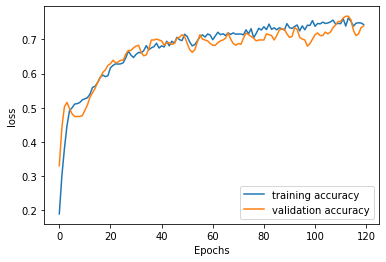

In [36]:
plt.figure()
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

Third Model
In the third model I just changed the epochs 

In [28]:
from keras import regularizers

original_model4= keras.Sequential([
 keras.layers.Dense(128, activation ='relu',input_dim=27),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(64 , activation ='relu',kernel_regularizer=regularizers.l2(0.001)),
 keras.layers.Dropout(0.25),
 keras.layers.Dense(16 , activation ='relu',kernel_regularizer=regularizers.l2(0.002)),
 keras.layers.Dropout(0.1),
 keras.layers.Dense(7,activation='softmax')])


original_model4.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])


In [29]:
hist4=original_model4.fit(X_train,Y_train,epochs=200,validation_data=(X_test,Y_test))


Epoch 1/200
49/49 [==============================] - 1s 10ms/step - loss: 1.6874 - accuracy: 0.4359 - val_loss: 1.3709 - val_accuracy: 0.4742
Epoch 2/200
49/49 [==============================] - 0s 5ms/step - loss: 1.3589 - accuracy: 0.5390 - val_loss: 1.1877 - val_accuracy: 0.5361
Epoch 3/200
49/49 [==============================] - 0s 6ms/step - loss: 1.2072 - accuracy: 0.6033 - val_loss: 1.0339 - val_accuracy: 0.6727
Epoch 4/200
49/49 [==============================] - 0s 5ms/step - loss: 1.0934 - accuracy: 0.6465 - val_loss: 0.9595 - val_accuracy: 0.6624
Epoch 5/200
49/49 [==============================] - 0s 5ms/step - loss: 1.0101 - accuracy: 0.6619 - val_loss: 0.8976 - val_accuracy: 0.6985
Epoch 6/200
49/49 [==============================] - 0s 5ms/step - loss: 0.9822 - accuracy: 0.6652 - val_loss: 0.8588 - val_accuracy: 0.6985
Epoch 7/200
49/49 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.6890 - val_loss: 0.8371 - val_accuracy: 0.7036
Epoch 8/200


We can see that our model start to overfit but we have best results for our case. But in real case if we really want to predict with some features we cannot use this model

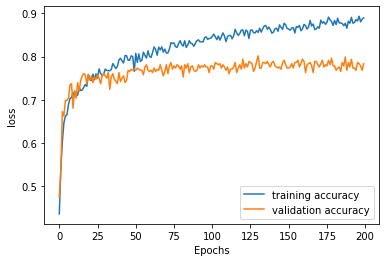

In [30]:
plt.figure()
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

## Results 
1. For the best accuracy we have 78% of accuracy for the test set. but it is for the model that overfit a little bit with our train set.
2. The model that we should use is the second one. Because it don't overfit and the accuracy for the test set is 74%

In [31]:
loss,acc=original_model4.evaluate(X_test,Y_test)
print(loss,acc)


13/13 [==============================] - 0s 3ms/step - loss: 0.7661 - accuracy: 0.7835
0.7660616636276245 0.7835051417350769
